In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import warnings 

In [2]:
df = pd.read_csv('../../../data/kc_house_data.csv')
df= df.dropna()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


# Cleaning Data - mainly outliers 

- removing Null values
- handling placeholder values
- removing outliers
- dropping irrelevant columns (like id)

In [3]:
df=df.drop(['id'], axis=1)

# Visualizing some of the data

<function matplotlib.pyplot.show(close=None, block=None)>

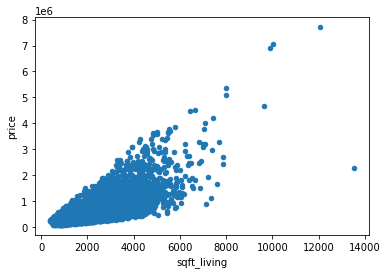

In [4]:
df.plot(kind='scatter', x='sqft_living', y='price')
plt.show

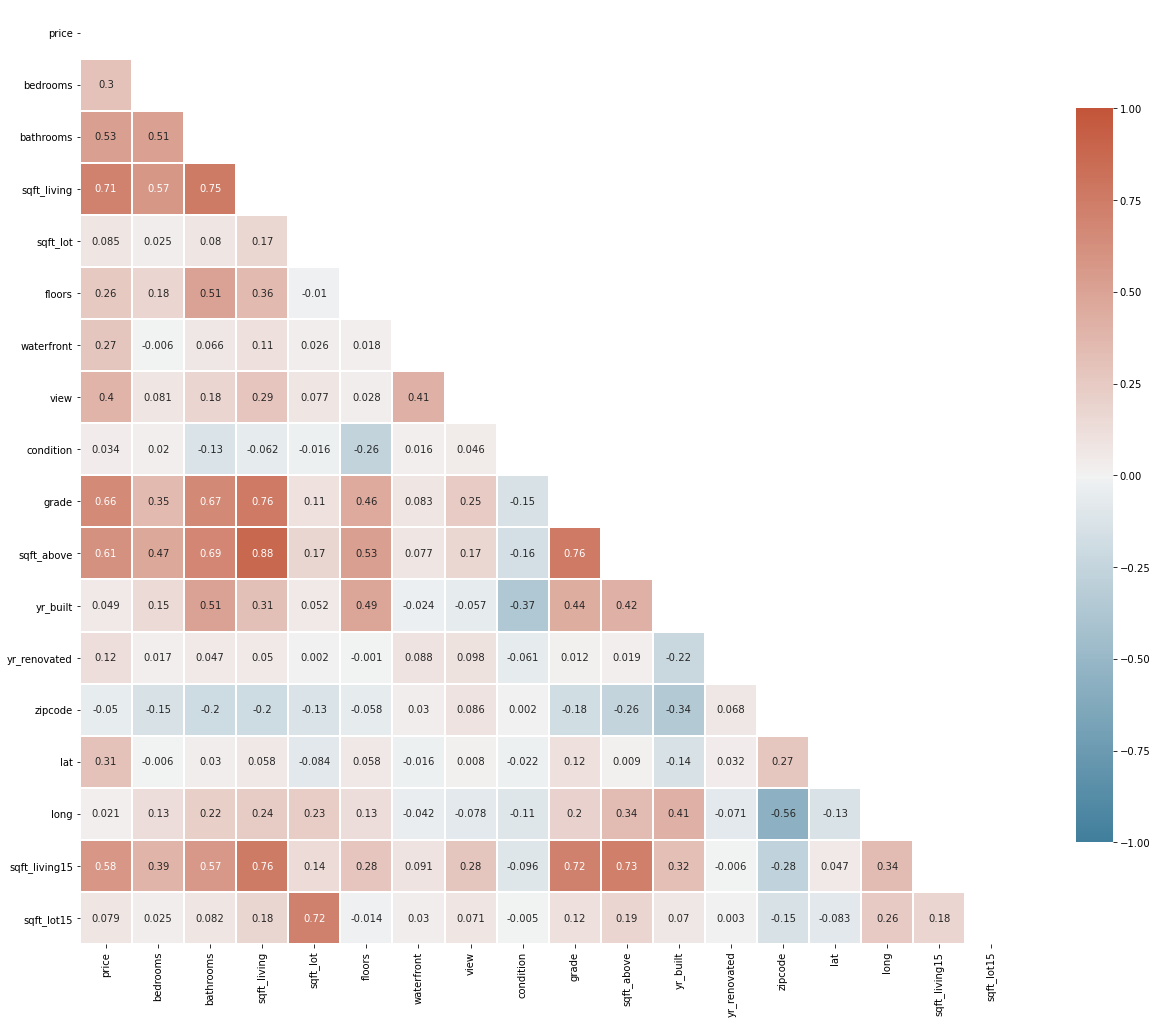

In [5]:
#checking for correlations 
corr = round(df.corr(), 3)
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(21, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .75}, annot=True)

In [6]:
#cells to take out of df - bathrooms, sqft_above, grade,sgft_living15, sgft_lot15, bedrooms

In [7]:
df = df.drop([ 'sqft_above', 'date', 'sqft_living15', 'sqft_lot15'], axis=1)

In [8]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,1530.0,2001,0.0,98053,47.6561,-122.005
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,?,1995,0.0,98003,47.3097,-122.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,3,8,130.0,2008,0.0,98116,47.5773,-122.409
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,0.0,2009,0.0,98103,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,0.0,2014,0.0,98146,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,0.0,2009,0.0,98144,47.5944,-122.299


In [9]:
# df["waterfront"].fillna(.007596, inplace = True)
# df['view'].fillna(.233863, inplace = True)
# df['yr_renovated'].fillna(83.636778, inplace = True)
# df['sqft_basement'].fillna(0, inplace = True)

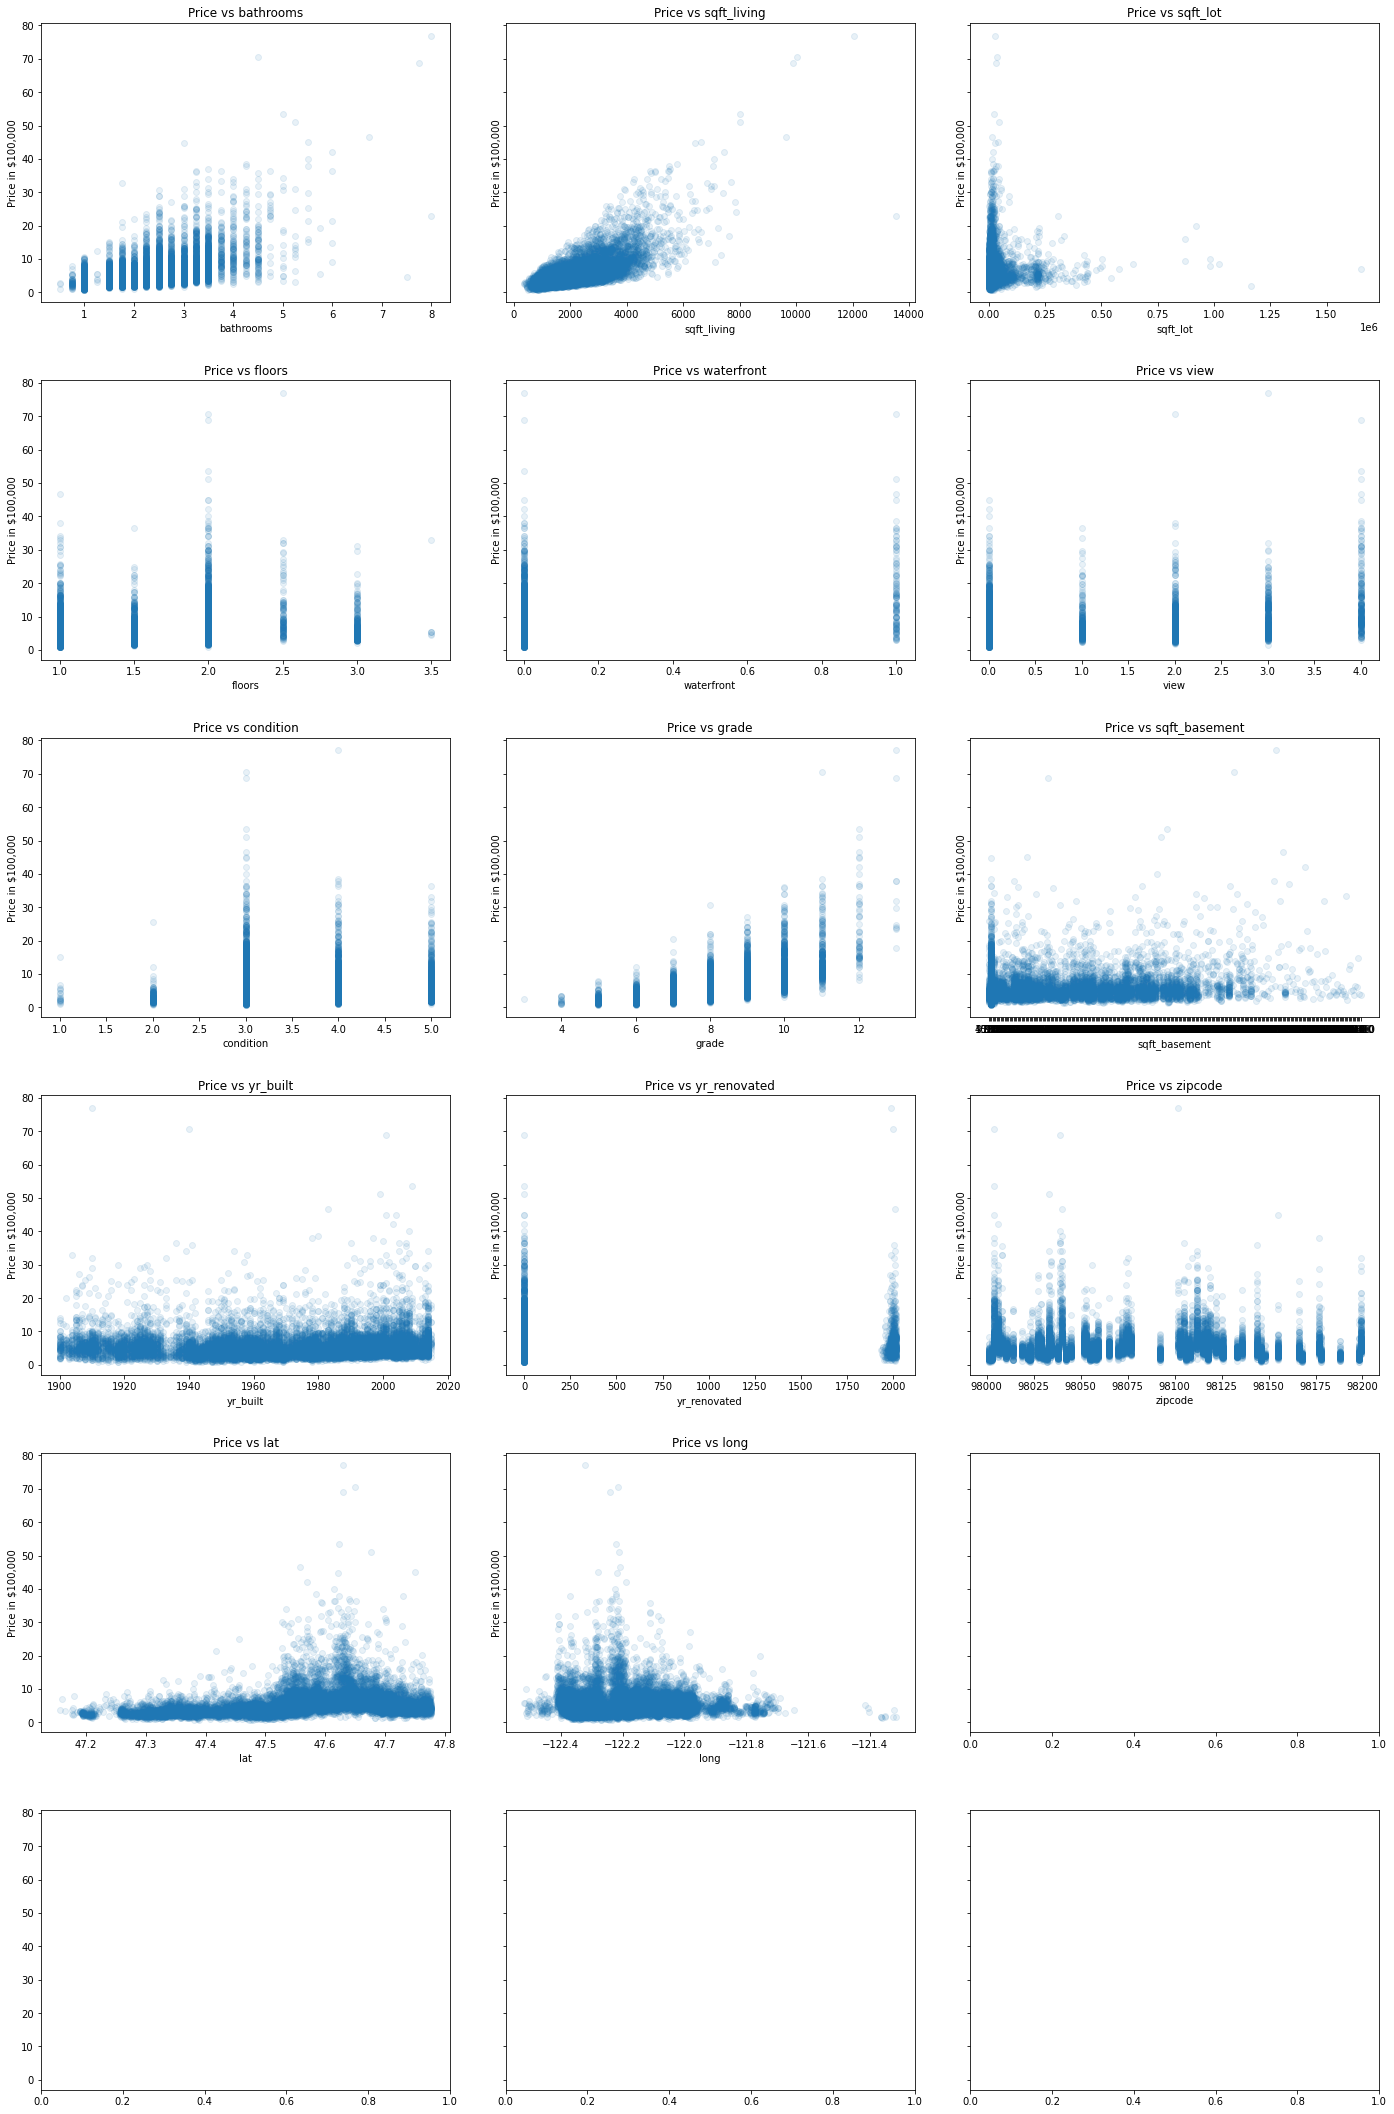

In [10]:
fig, axes = plt.subplots(6, 3, figsize=(20,30), sharey=True)
for ax, column in zip(axes.flatten(), df.columns[2:]):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')
fig.tight_layout(pad=3.0)

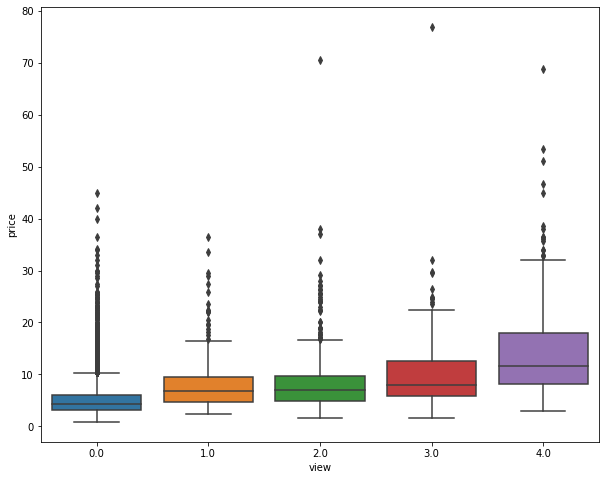

In [11]:
var = 'view'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)

In [12]:
mean_no_view = df.loc[(df['view'] == 0), 'price'].mean()
mean_view = df.loc[(df['view'] != 0), 'price'].mean()
mean_view - mean_no_view
#difference between view and no view 
#we can conclude that view does influence the price of a home.

455467.38816238416

In [13]:
df['yes_view'] = np.where(df['view'] != 0, 1, 0)
#boolean column for view. Can be used as predictor 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15762 non-null  float64
 1   bedrooms       15762 non-null  int64  
 2   bathrooms      15762 non-null  float64
 3   sqft_living    15762 non-null  int64  
 4   sqft_lot       15762 non-null  int64  
 5   floors         15762 non-null  float64
 6   waterfront     15762 non-null  float64
 7   view           15762 non-null  float64
 8   condition      15762 non-null  int64  
 9   grade          15762 non-null  int64  
 10  sqft_basement  15762 non-null  object 
 11  yr_built       15762 non-null  int64  
 12  yr_renovated   15762 non-null  float64
 13  zipcode        15762 non-null  int64  
 14  lat            15762 non-null  float64
 15  long           15762 non-null  float64
 16  yes_view       15762 non-null  int32  
dtypes: float64(8), int32(1), int64(7), object(1)
memor

In [15]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,yes_view
count,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000
mean,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,0.007613,0.229984,3.410862,7.663748,1971.111217,82.440236,98077.558241,47.559177,-122.213520,0.096498
std,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,0.086924,0.761324,0.651961,1.172238,29.336823,397.212626,53.414906,0.138629,0.140706,0.295282
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,0.000000
25%,3.210000e+05,3.000000,1.750000,1430.000000,5.048500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1952.000000,0.000000,98033.000000,47.469200,-122.328000,0.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571000,-122.229000,0.000000
75%,6.448750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98117.000000,47.677400,-122.124000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,1.000000


In [16]:
df=df.dropna()

In [17]:
df.shape

(15762, 17)

# Preprocessing

- Encoding features
- Scaling Features
- Feature Engineering

# Encoding categorical Features

In [39]:
catagorical_df = ['bedrooms', 'bathrooms', 'grade']
encoded_df = pd.get_dummies(df, columns = catagorical_df)

# Plotting continous values 

No handles with labels found to put in legend.


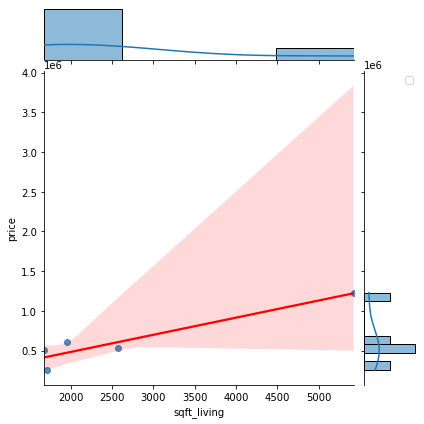

No handles with labels found to put in legend.


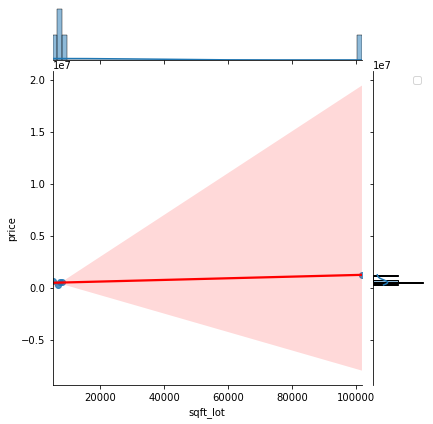

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

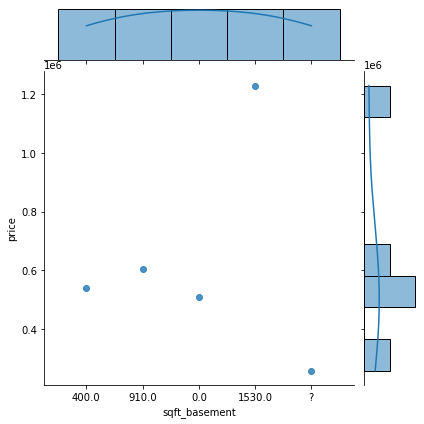

In [553]:
continuous = ['sqft_living','sqft_lot','sqft_basement','yr_built']

for column in continuous:
    sns.jointplot(x=column, y="price", data=df, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
    plt.legend()
    plt.show()
#plotting continous variables 

In [ ]:
df.shape

In [ ]:
df['sqft_basement'].describe()

In [ ]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [ ]:
mean_basement_no_outliers = df.loc[(df['sqft_basement'] != 4820) | (df['sqft_basement'] != 0), 'sqft_basement'].mean()

In [ ]:
df['sqft_basement'] = np.where((df['sqft_basement'] == 4820) | (df['sqft_basement'] == 0), round(mean_basement_no_outliers), df['sqft_basement'])

In [ ]:
df['sqft_lot'].describe()

In [ ]:
mean_sqft_living_no_outliers = df.loc[(df['sqft_living'] != 13540) | (df['sqft_living'] != 370), 'sqft_living'].mean()

In [ ]:
df['sqft_living'] = np.where((df['sqft_living'] == 13540) | (df['sqft_living'] == 370), round(mean_sqft_living_no_outliers), df['sqft_living'])

In [ ]:
df['sqft_basement'].describe()

In [ ]:
mean_sqft_lot_no_outliers = df.loc[(df['sqft_lot'] != 1.651359e+06) | (df['sqft_lot'] != 5.200000e+02), 'sqft_lot'].mean()

In [ ]:
df['sqft_lot'] = np.where((df['sqft_lot'] == 1.651359e+06) | (df['sqft_lot'] == 5.200000e+02), round(mean_sqft_lot_no_outliers), df['sqft_lot'])

# Preprocessing

In [ ]:
df_dummy['basement'] = np.where((df_dummy['sqft_basement'] != 0), 1, 0)
#feature eng. basementy boolean
#change df_dummy to encoded_df

# PUT THIS CODE EARLIER IN THE NOTEBOOK AND RENAME APPROPRIATELY

In [54]:
cleaned_df = df.replace(to_replace="?", value=np.NaN).dropna()


In [42]:
encoded_df = encoded_df.replace(to_replace="?", value=np.NaN).dropna()


# Model 

In [45]:
df.shape

(15762, 17)

In [43]:
encoded_df.shape

(15429, 64)

## Baseline Model

In [60]:
# splitting up the target variable from the dataset
X = cleaned_df.drop(columns='price', axis=1)
y = cleaned_df['price']

In [61]:
# Split the dataset into train test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state =42)

In [62]:
regr = LinearRegression()
regr.fit(X_train, y_train)

# training score for baseline model
regr.score(X_train, y_train)

0.6933289366330107

In [63]:
# testing score for baseline model
regr.score(X_test, y_test)

0.7169617054678108

## Advanced Model

In [46]:
# splitting up the target variable from the dataset
X = encoded_df.drop(columns='price', axis=1)
y = encoded_df['price']

In [47]:
# Split the dataset into train test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state =42)

In [48]:
regr = LinearRegression()

regr.fit(X_train, y_train)

LinearRegression()

In [49]:
# y_pred = regr.predict(X_test)

regr.score(X_train, y_train)

0.7422631480716899

In [50]:
regr.score(X_test, y_test)

0.7365285827811558

In [ ]:
#fill zeros with mean value/no nan values 

In [ ]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)
#~229k per house prediction

In [ ]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)

In [ ]:
coefficients

In [ ]:
test_preds = lm.predict(X_test)

In [ ]:
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_preds))
print(test_rmse )
#test set preformed better than train set 

In [ ]:
sns.residplot(y_test, test_preds, lowess=True, color='g');